In [150]:
import pandas as pd
import numpy as np

df = pd.read_csv('strokeData.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [151]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [152]:
mean1 = df['bmi'].mean()
print(mean1)
df = df.fillna({'bmi': mean1})
#df = df.interpolate()

28.893236911794666


In [153]:
from matplotlib import colors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create the subplots based on the number of categorical columns
fig = make_subplots(rows=2, cols=4, specs=[[{'type':'domain'}]*4]*2, vertical_spacing=0.1, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(categorical_columns):
    value_counts = df[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on purple color
    cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Calculate the row and column indices based on the total number of subplots
    row_index = (i // 4) + 1
    col_index = (i % 4) + 1

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=row_index, col=col_index)

# Update the layout
fig.update_layout(showlegend=False, height=600, width=990, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.92,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

In [154]:
from plotly.subplots import make_subplots

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Create a subplot with three histograms
fig = make_subplots(rows=1, cols=3, subplot_titles=numerical_columns)

# Define color map based on purple color
cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
norm = colors.Normalize(vmin=0, vmax=len(numerical_columns))
color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(numerical_columns))]

for i, col in enumerate(numerical_columns, 1):
    # Add a histogram for each numerical column with purple color
    fig.add_trace(go.Histogram(x=df[col], xbins=dict(size=5), name=col, marker=dict(color=color_list[i-1])), row=1, col=i)

# Update the layout
fig.update_layout(showlegend=False, height=400, width=990, 
                   title={
                          'text':"Distribution of Numerical Variables",
                          'y':0.90,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

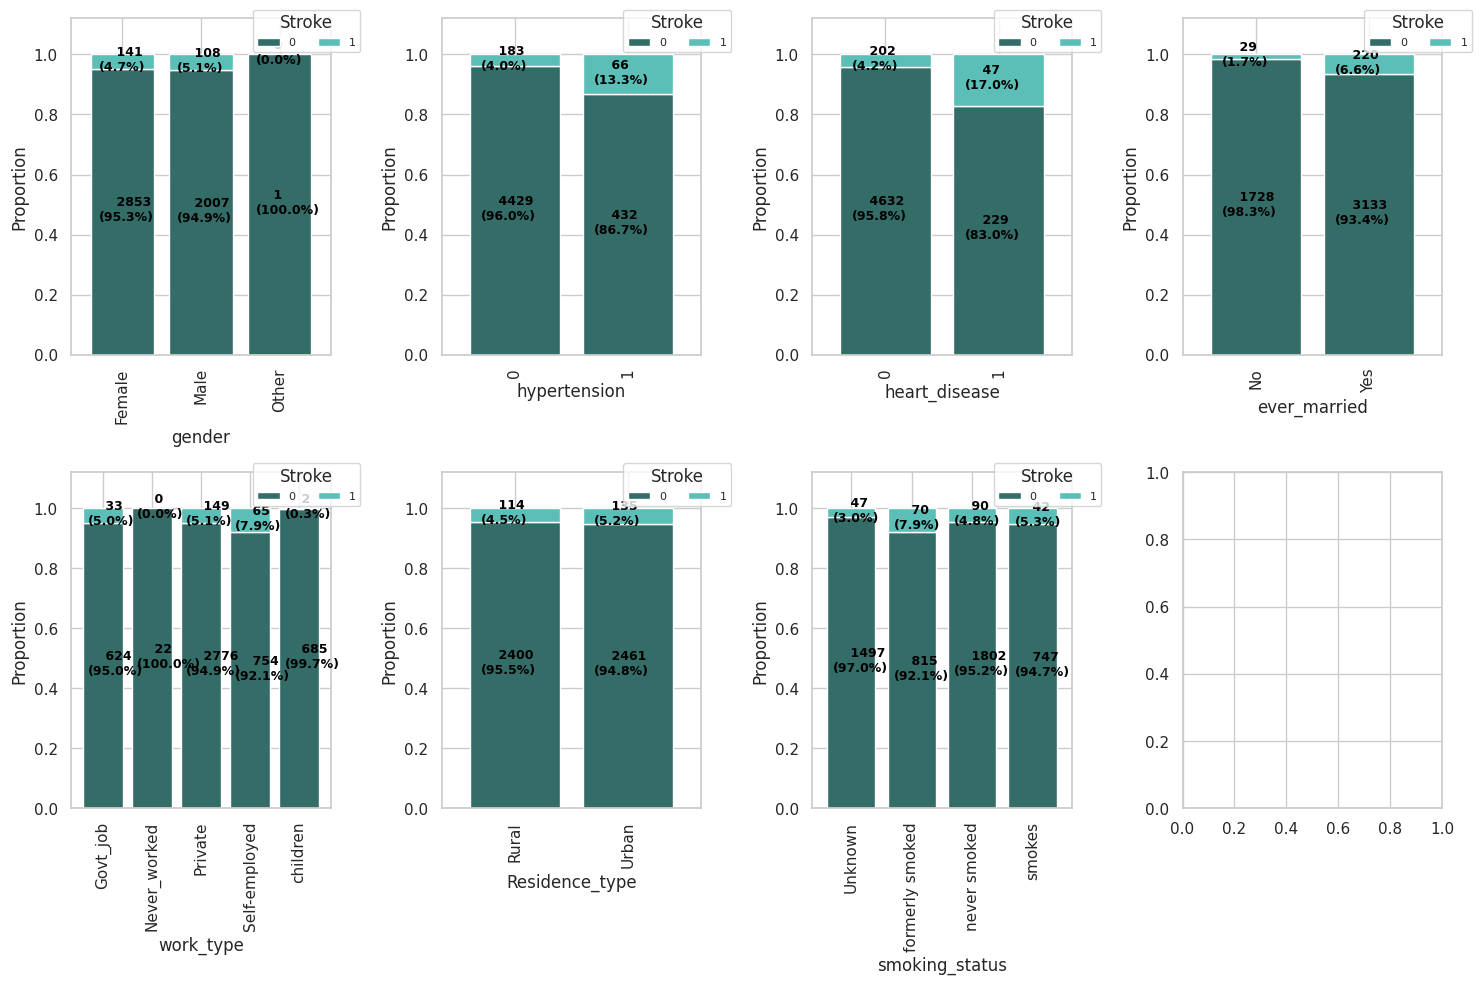

In [155]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
y_col = 'stroke'

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, col in enumerate(x_cols):
    # Create a cross tabulation showing the proportion of the target variable for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[y_col])
    cross_tab_prop = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)  # Normalize the data
    
    # Define colormap
    cmp = ListedColormap(['#346c68', '#5bbeb7'])
    
    # Plot stacked bar charts
    x, y = i // 4, i % 4
    cross_tab_prop.plot(kind='bar', stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', ax=axes[x, y])
    
    # Add labels and counts to the bars
    for idx, val in enumerate(cross_tab_prop.index.values):
        for proportion, count, y_location in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            axes[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                             s=f'    {count}\n({np.round(proportion * 100, 1)}%)',
                             color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    axes[x, y].legend(title=y_col.capitalize(), loc=(0.7, 0.9), fontsize=8, ncol=2)
    
    # Set y limit
    axes[x, y].set_ylim([0, 1.12])

plt.tight_layout()
plt.show()

In [156]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

strokeG = df.loc[df['stroke']== 1].reset_index()

strokeG["male_age"]=strokeG[strokeG["gender"]=="Male"]["age"]
strokeG["female_age"]=strokeG[strokeG["gender"]=="Female"]["age"]
strokeG[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

In [157]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


check for outliers here and fix them

detecting

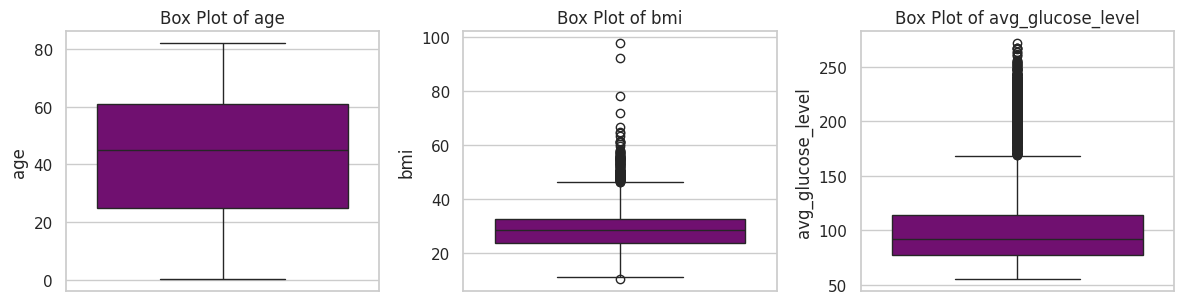

In [158]:
import seaborn as sns

numeric_variables = ['age', 'bmi', 'avg_glucose_level']

# Set the size of the plot grid
plt.figure(figsize=(12, 6))

# Create Box Plots for Outlier Detection
for i, numeric_var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[numeric_var], color='purple')
    plt.title(f'Box Plot of {numeric_var}')
    plt.ylabel(numeric_var)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

fixing

Shape after removing outliers: (4390, 12)


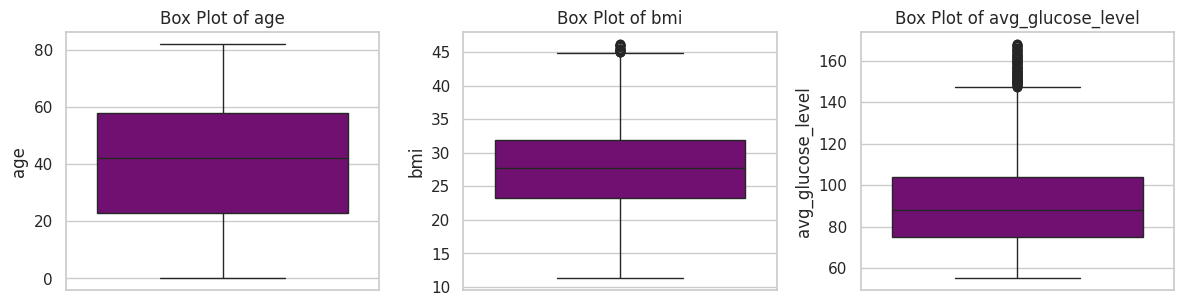

In [159]:
columns_to_check = ['bmi', 'avg_glucose_level']

# Loop through each column and remove outliers using IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get boolean array indicating the presence of outliers for the current column
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Remove rows containing outliers for the current column
    df = df[~outliers]

# Verify the changes
print("Shape after removing outliers:", df.shape)
numeric_variables = ['age', 'bmi', 'avg_glucose_level']

# Set the size of the plot grid
plt.figure(figsize=(12, 6))

# Create Box Plots for Outlier Detection
for i, numeric_var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[numeric_var], color='purple')
    plt.title(f'Box Plot of {numeric_var}')
    plt.ylabel(numeric_var)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [160]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['gender']=label_encoder.fit_transform(df['gender'])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [161]:
df = df.drop_duplicates()

Correlation Map

                         id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.003134  0.013571      0.014426      -0.000279   
gender             0.003134  1.000000 -0.047553      0.019866       0.089272   
age                0.013571 -0.047553  1.000000      0.252344       0.239817   
hypertension       0.014426  0.019866  0.252344      1.000000       0.090573   
heart_disease     -0.000279  0.089272  0.239817      0.090573       1.000000   
ever_married       0.018626 -0.045858  0.685664      0.150405       0.106211   
work_type         -0.022498  0.067000 -0.390007     -0.058364      -0.028129   
Residence_type     0.005399 -0.005042  0.010756     -0.009601      -0.012522   
avg_glucose_level  0.024572  0.032221 -0.026012      0.002433      -0.000535   
bmi                0.018127 -0.002188  0.377089      0.150011       0.055670   
smoking_status     0.014140 -0.055580  0.287680      0.115575       0.055791   
stroke             0.000493 -0.001682  0

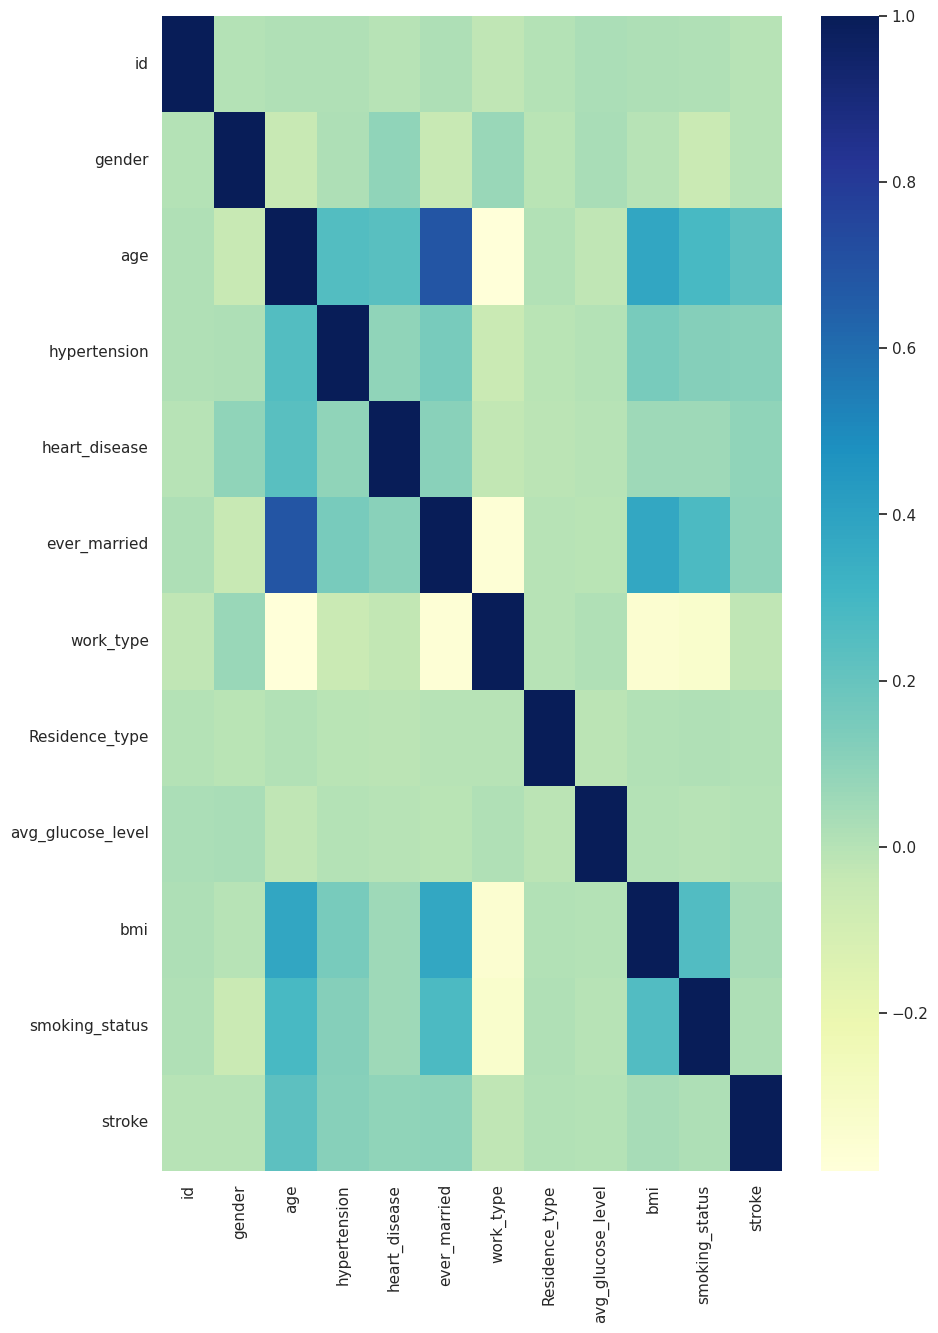

In [162]:
import matplotlib.pyplot as mp
import seaborn as sns
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

In [163]:
df.stroke.value_counts()

stroke
0    4225
1     165
Name: count, dtype: int64

Data is imbalanced

fix 1 oversampling  (just have to use df_test_over instead of df)

In [164]:
count_class_0, count_class_1 = df.stroke.value_counts()

df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.stroke.value_counts())

Random over-sampling:
stroke
0    4225
1    4225
Name: count, dtype: int64


In [165]:
df = df.drop('id', axis='columns')

In [166]:
Y = df["stroke"]
X = df.drop('stroke', axis='columns')

Below is the fix 2 of oversampling SMOTE (better than oversampling) use X_sm and y_sm instead

In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

stroke
1    4225
0    4225
Name: count, dtype: int64

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)
X_scaled

array([[ 1.48636060e+00,  1.16111002e+00, -2.48108422e-01, ...,
         6.16118623e-01,  7.63203217e-01,  7.78928662e-01],
       [ 1.48636060e+00,  8.97369640e-01,  4.03049599e+00, ...,
        -9.23669590e-01, -1.60138816e-01,  7.78928662e-01],
       [-6.72042402e-01,  6.77585993e-01, -2.48108422e-01, ...,
         1.20618815e-01, -9.92957119e-01,  7.78928662e-01],
       ...,
       [-6.72042402e-01,  2.68244403e-01, -2.48108422e-01, ...,
        -1.14627386e-01,  1.60775983e+00, -2.46137090e-01],
       [-6.72042402e-01, -3.07549495e-02, -2.48108422e-01, ...,
         3.11848011e+00,  1.43317002e-03, -2.46137090e-01],
       [ 1.48636060e+00,  7.07679015e-01, -2.48108422e-01, ...,
         7.28388194e-03,  6.33834776e-02, -1.27120284e+00]])

In [169]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.30, shuffle=True, random_state=10, stratify=y_sm)

here we used stratify=Y because there is imbalance so that xtrain and xtest both are balanced when samples divided among them

NOTE X and Y have been interchanged from AKpython

In [170]:
y_train.value_counts()

stroke
0    2958
1    2957
Name: count, dtype: int64

MODELS EVALUATION

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [172]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': range(2, 10),
            'min_samples_split': range(2, 20),
            'criterion': ['gini', 'entropy']
        }
    }
}



scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.886785,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.903748,{'n_estimators': 10}
2,logistic_regression,0.799211,{'C': 5}
3,decision_tree,0.869822,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [173]:
g_acc = []
g_prec = []
g_rec = []
g_f1 = []

Decision Tree Classifier    (Note can also use bagged DecisionTreeClassifier)

In [174]:
from sklearn.tree import DecisionTreeClassifier


loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the decision tree classifier
clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(x_train, y_train)

# Evaluate the decision tree classifier on the test set
y_pred = clf1.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the decision tree classifier
scores_cross_1 = cross_val_score(DecisionTreeClassifier(), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_1.mean())

# Train the bagged decision tree classifier
bag_model_1 = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=100,
    max_samples=0.9,
    oob_score=True,
    random_state=0
)

bag_model_1.fit(X_scaled, y_sm)

# Evaluate the bagged decision tree classifier on the test set
y_pred = bag_model_1.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged decision tree classifier
scores_bagged_1 = cross_val_score(bag_model_1, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_1.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Accuracy: 0.8209072978303747
Precision: 0.785814606741573
Recall: 0.8824921135646687
F1: 0.8313521545319464
Mean cross-validation accuracy: 0.9233136094674557


Accuracy (bagged): 1.0
Precision (bagged): 1.0
Recall (bagged): 1.0
F1 (bagged): 1.0
Mean cross-validation accuracy (bagged): 0.9513609467455622


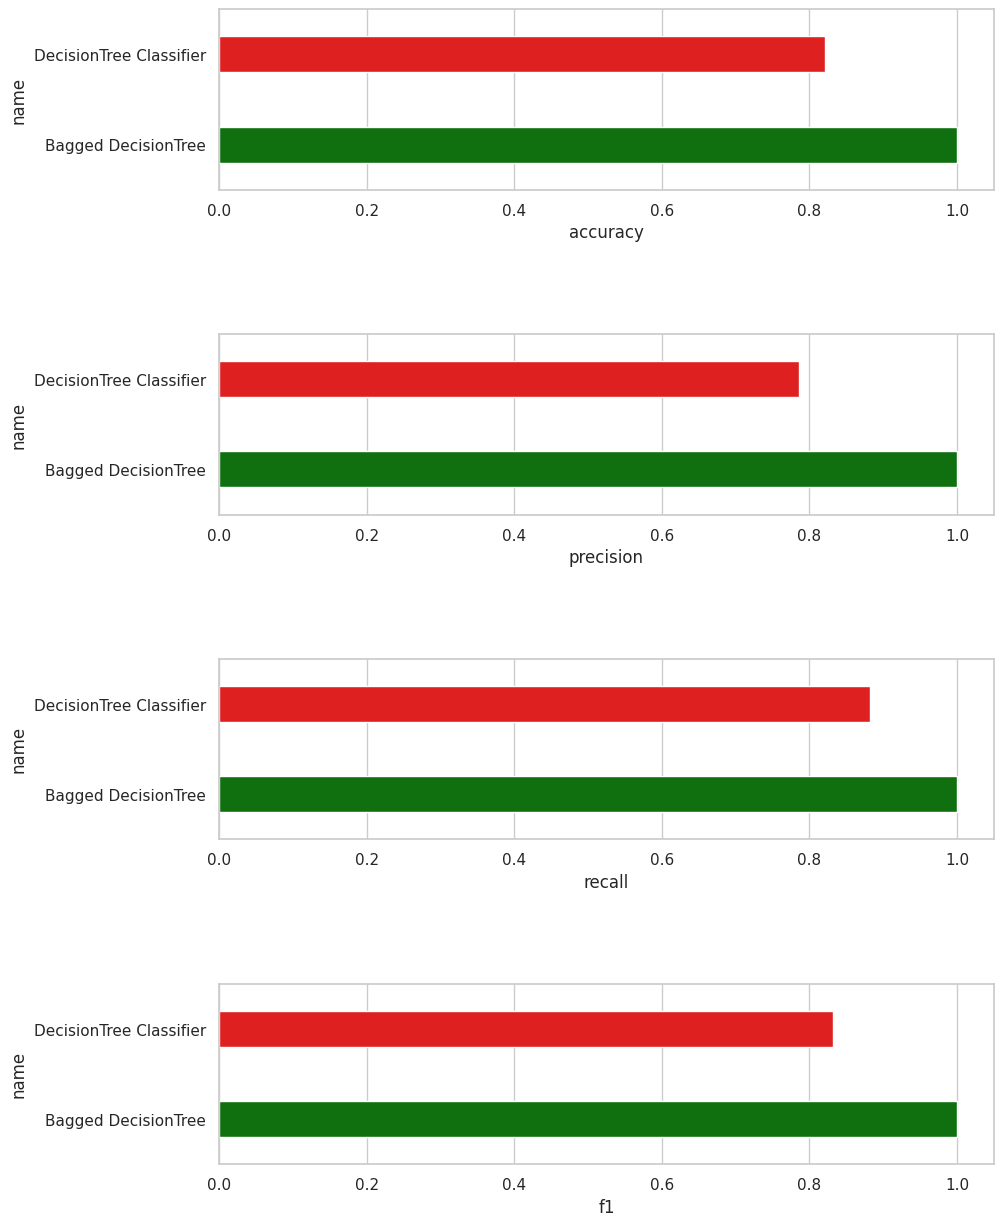

In [175]:
model_names = ['DecisionTree Classifier', 'Bagged DecisionTree']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'DecisionTree Classifier') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

SVM  (do it for poly and rf as well using grid cross cv and also try bagging them)

In [176]:
from sklearn.svm import SVC

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the support vector machine classifier
clf2 = SVC(kernel="rbf", C=20)
clf2.fit(x_train, y_train)

# Evaluate the support vector machine classifier on the test set
y_pred = clf2.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the support vector machine classifier
scores_cross_2 = cross_val_score(SVC(kernel="rbf", C=20), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_2.mean())

# Train the bagged support vector machine classifier
bag_model_2 = BaggingClassifier(
    estimator=SVC(kernel="rbf", C=20),
    n_estimators=30,
    max_samples=0.8,
    random_state=0
)

bag_model_2.fit(X_scaled, y_sm)

# Evaluate the bagged support vector machine classifier on the test set
y_pred = bag_model_2.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged support vector machine classifier
scores_bagged_2 = cross_val_score(bag_model_2, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_2.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())


Accuracy: 0.9025641025641026
Precision: 0.8607773851590106
Recall: 0.9605678233438486
F1: 0.9079388743943346
Mean cross-validation accuracy: 0.9027218934911243
Accuracy (bagged): 0.9211045364891519
Precision (bagged): 0.8836206896551724
Recall (bagged): 0.9700315457413249
F1 (bagged): 0.924812030075188
Mean cross-validation accuracy (bagged): 0.8996449704142012


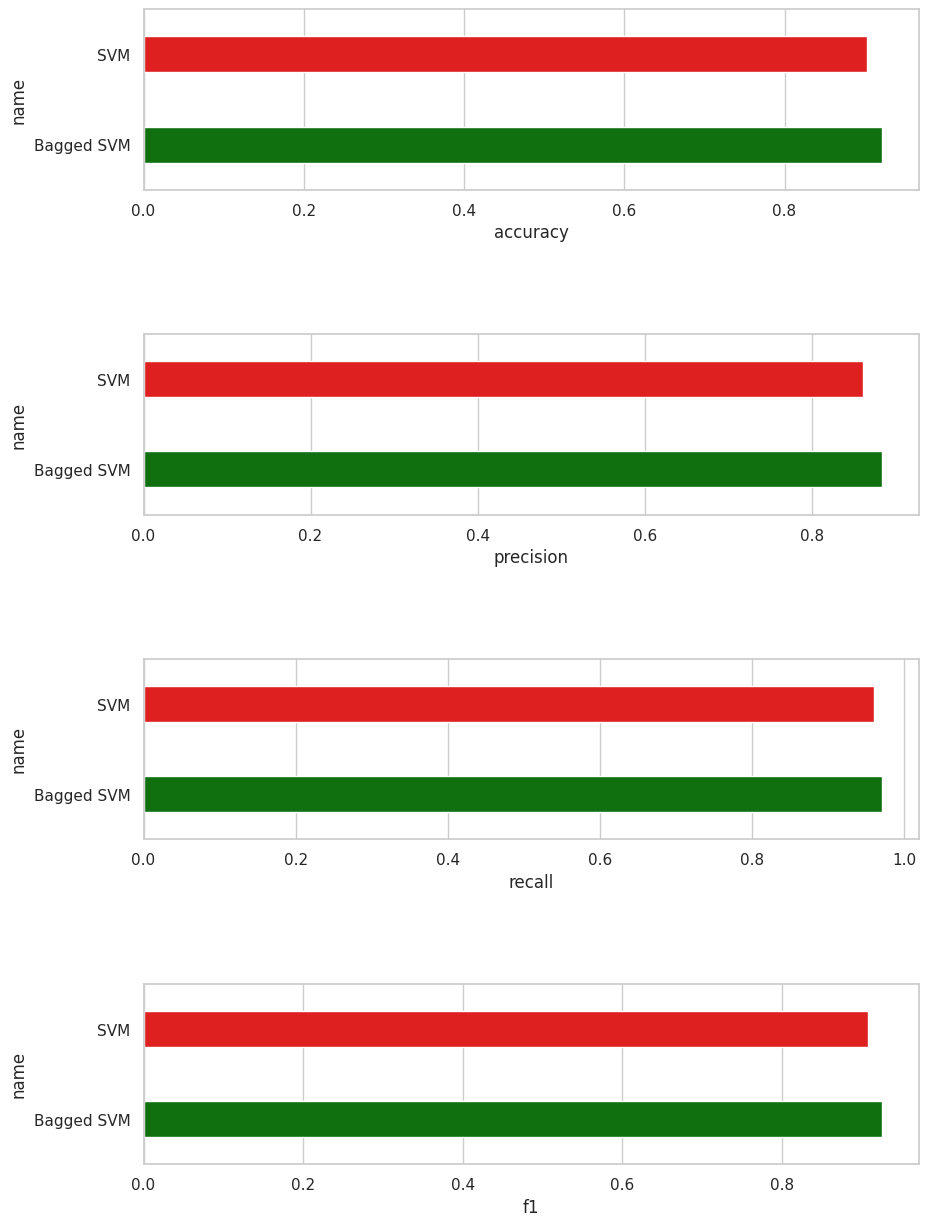

In [177]:
model_names = ['SVM', 'Bagged SVM']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'SVM') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

KNeighbors Classifier

In [178]:
from sklearn.neighbors import KNeighborsClassifier

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the K-Nearest Neighbors classifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(x_train, y_train)

# Evaluate the K-Nearest Neighbors classifier on the test set
y_pred = clf3.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the K-Nearest Neighbors classifier
scores_cross_3 = cross_val_score(KNeighborsClassifier(), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_3.mean())

# Train the bagged K-Nearest Neighbors classifier
bag_model_3 = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=100,
    max_samples=0.8,
    random_state=0
)

bag_model_3.fit(X_scaled, y_sm)

# Evaluate the bagged K-Nearest Neighbors classifier on the test set
y_pred = bag_model_3.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged K-Nearest Neighbors classifier
scores_bagged_3 = cross_val_score(bag_model_3, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_3.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Accuracy: 0.9057199211045365
Precision: 0.8585365853658536
Recall: 0.9716088328075709
F1: 0.9115797262301146
Mean cross-validation accuracy: 0.8962130177514792
Accuracy (bagged): 0.9250493096646942
Precision (bagged): 0.8817280453257791
Recall (bagged): 0.9818611987381703
F1 (bagged): 0.9291044776119404
Mean cross-validation accuracy (bagged): 0.8894674556213017


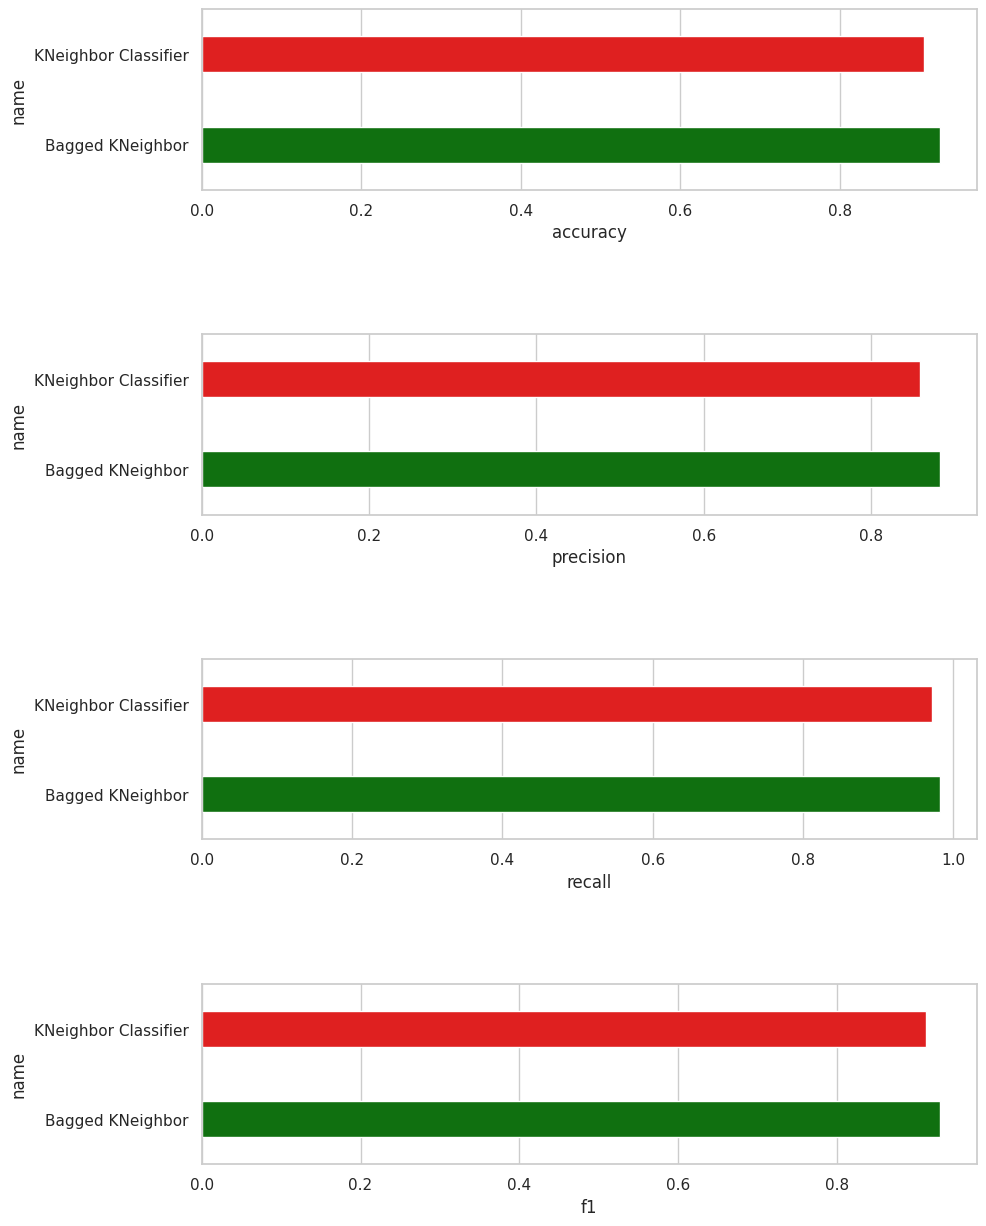

In [179]:
model_names = ['KNeighbor Classifier', 'Bagged KNeighbor']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'KNeighbor Classifier') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

Naive Bayes Classifier

In [180]:
from sklearn.naive_bayes import GaussianNB

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the Gaussian Naive Bayes classifier
clf4 = GaussianNB()
clf4.fit(x_train, y_train)

# Evaluate the Gaussian Naive Bayes classifier on the test set
y_pred = clf4.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the Gaussian Naive Bayes classifier
scores_cross_4 = cross_val_score(GaussianNB(), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_4.mean())

# Train the bagged Gaussian Naive Bayes classifier
bag_model_4 = BaggingClassifier(
    estimator=GaussianNB(),
    n_estimators=100,
    max_samples=0.8,
    random_state=0
)

bag_model_4.fit(X_scaled, y_sm)

# Evaluate the bagged Gaussian Naive Bayes classifier on the test set
y_pred = bag_model_4.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged Gaussian Naive Bayes classifier
scores_bagged_4 = cross_val_score(bag_model_4, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_4.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Accuracy: 0.8019723865877713
Precision: 0.7570469798657719
Recall: 0.889589905362776
F1: 0.8179840464104424
Mean cross-validation accuracy: 0.7981065088757396


Accuracy (bagged): 0.8007889546351085
Precision (bagged): 0.7565568258238063
Recall (bagged): 0.887223974763407
F1 (bagged): 0.8166969147005444
Mean cross-validation accuracy (bagged): 0.7983431952662723


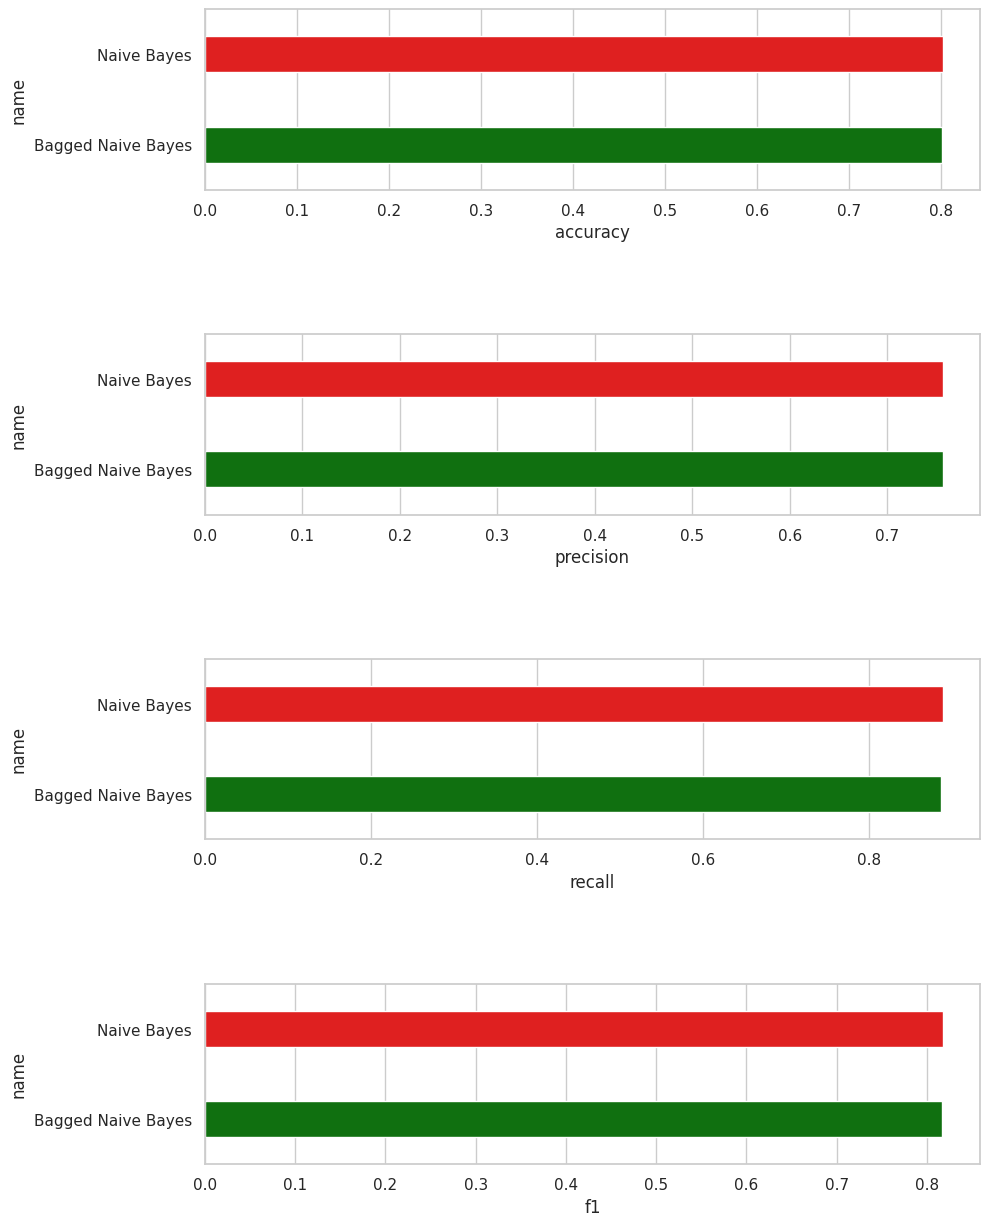

In [181]:
model_names = ['Naive Bayes', 'Bagged Naive Bayes']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'Naive Bayes') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

MLPClassifier

In [182]:
from sklearn.neural_network import MLPClassifier

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the Multilayer Perceptron classifier
clf5 = MLPClassifier(alpha=1, max_iter=1000)
clf5.fit(x_train, y_train)

# Evaluate the Multilayer Perceptron classifier on the test set
y_pred = clf5.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the Multilayer Perceptron classifier
scores_cross_5 = cross_val_score(MLPClassifier(alpha=1, max_iter=1000), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_5.mean())

# Train the bagged Multilayer Perceptron classifier
bag_model_5 = BaggingClassifier(
    estimator=MLPClassifier(alpha=1, max_iter=1000),
    n_estimators=8,
    max_samples=0.8,
    random_state=0
)

bag_model_5.fit(X_scaled, y_sm)

# Evaluate the bagged Multilayer Perceptron classifier on the test set
y_pred = bag_model_5.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged Multilayer Perceptron classifier
scores_bagged_5 = cross_val_score(bag_model_5, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_5.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())


Accuracy: 0.8461538461538461
Precision: 0.8325757575757575
Recall: 0.8667192429022083
F1: 0.8493044822256569
Mean cross-validation accuracy: 0.8506508875739645
Accuracy (bagged): 0.8560157790927022
Precision (bagged): 0.8412698412698413
Recall (bagged): 0.8777602523659306
F1 (bagged): 0.8591277499035122
Mean cross-validation accuracy (bagged): 0.8413017751479289


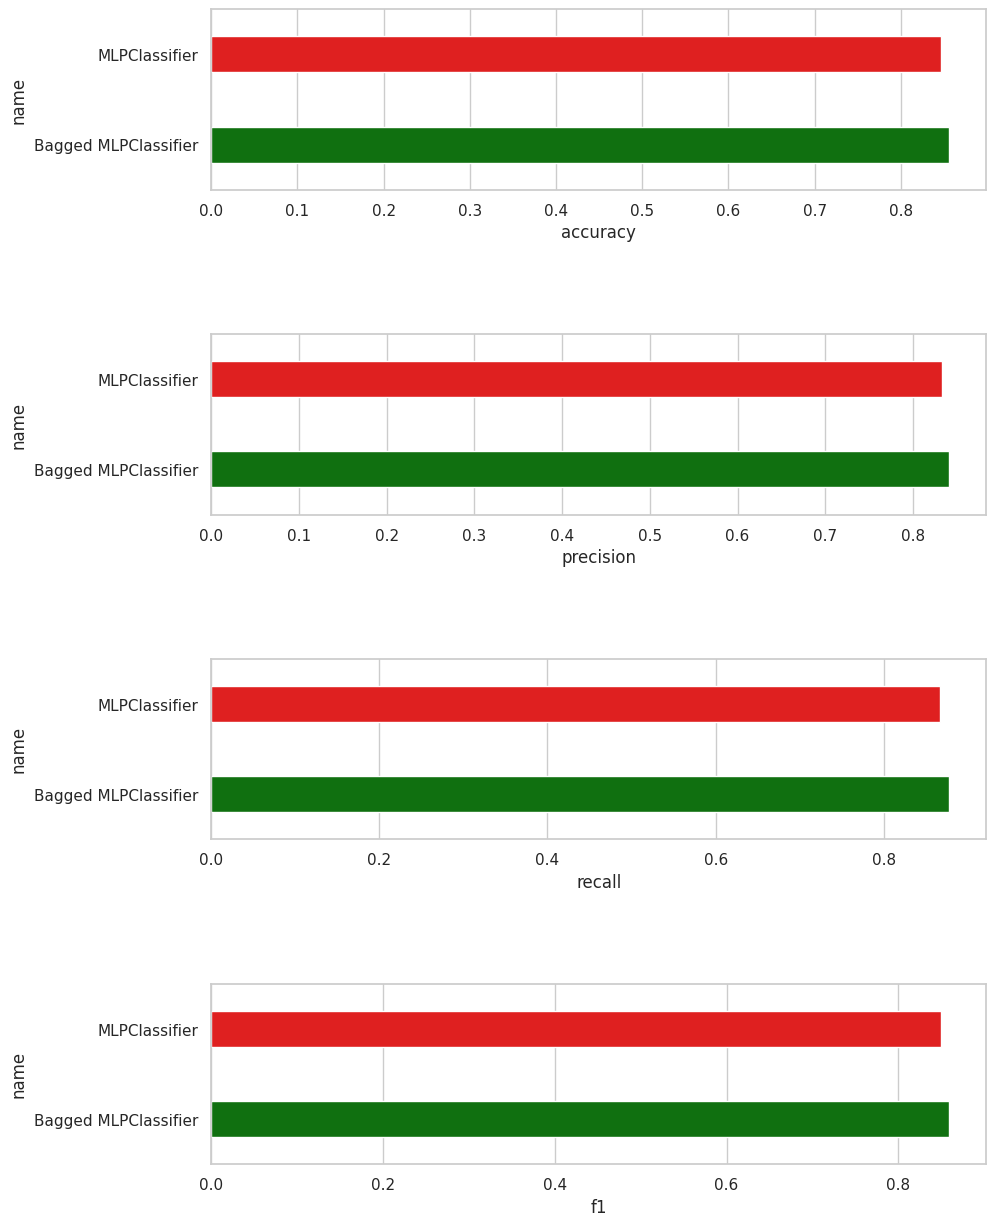

In [183]:
model_names = ['MLPClassifier', 'Bagged MLPClassifier']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'MLPClassifier') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

SGDClassifier

In [184]:
from sklearn.linear_model import SGDClassifier

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the Stochastic Gradient Descent classifier
clf6 = SGDClassifier(loss="hinge", penalty="l2")
clf6.fit(x_train, y_train)

# Evaluate the Stochastic Gradient Descent classifier on the test set
y_pred = clf6.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the Stochastic Gradient Descent classifier
scores_cross_6 = cross_val_score(SGDClassifier(loss="hinge", penalty="l2"), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_6.mean())

# Train the bagged Stochastic Gradient Descent classifier
bag_model_6 = BaggingClassifier(
    estimator=SGDClassifier(loss="hinge", penalty="l2"),
    n_estimators=100,
    max_samples=0.8,
    random_state=0
)

bag_model_6.fit(X_scaled, y_sm)

# Evaluate the bagged Stochastic Gradient Descent classifier on the test set
y_pred = bag_model_6.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged Stochastic Gradient Descent classifier
scores_bagged_6 = cross_val_score(bag_model_6, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_6.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Accuracy: 0.8011834319526627
Precision: 0.7859281437125748
Recall: 0.8280757097791798
F1: 0.8064516129032258
Mean cross-validation accuracy: 0.8065088757396449


Accuracy (bagged): 0.7956607495069034
Precision (bagged): 0.7875766871165644
Recall (bagged): 0.8099369085173501
F1 (bagged): 0.7986003110419906
Mean cross-validation accuracy (bagged): 0.8108875739644971


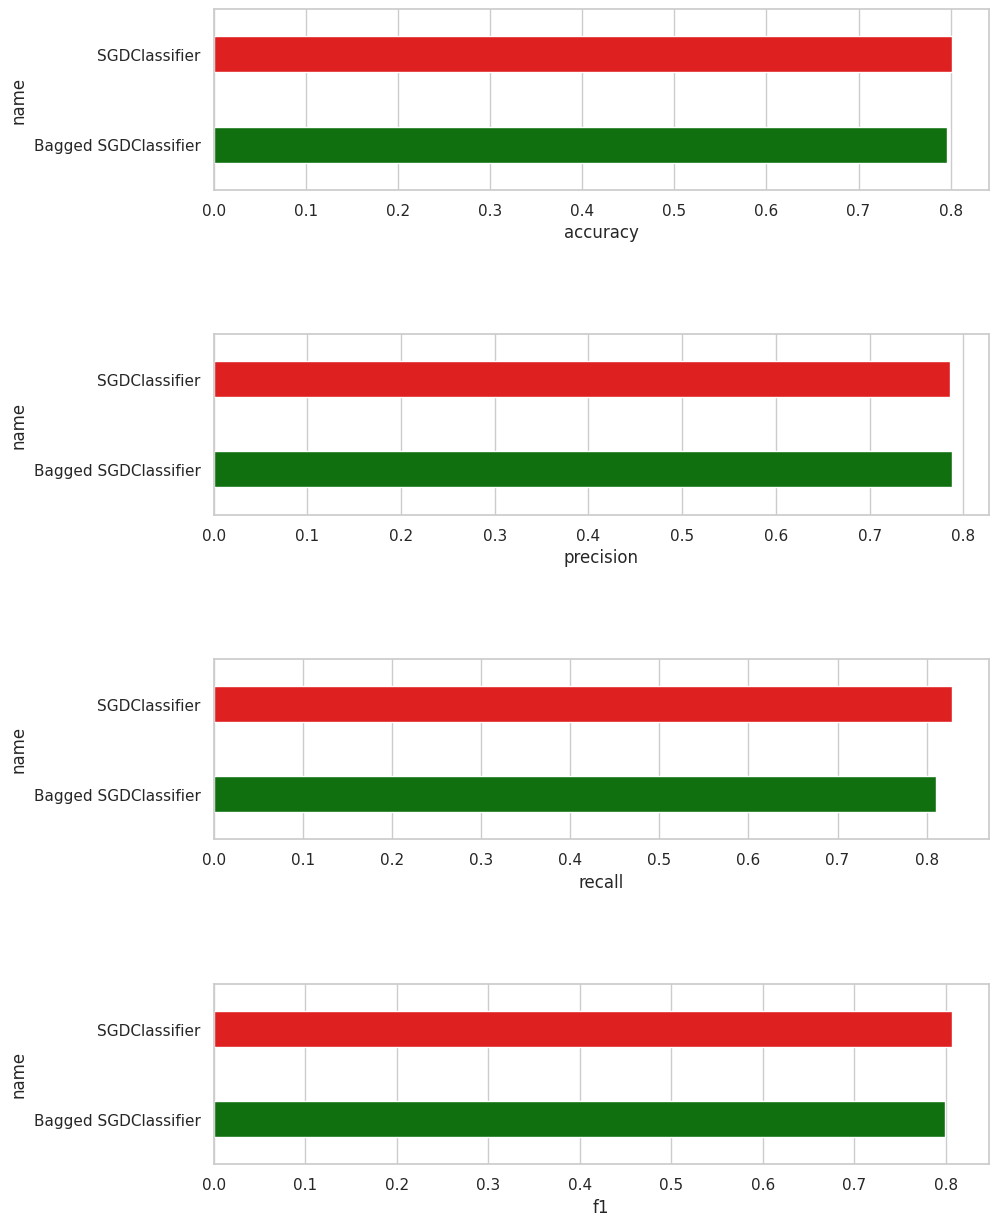

In [185]:
model_names = ['SGDClassifier', 'Bagged SGDClassifier']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'SGDClassifier') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Train the logistic regression classifier
clf7 = LogisticRegression(max_iter=1000)
clf7.fit(x_train, y_train)

# Evaluate the logistic regression classifier on the test set
y_pred = clf7.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Perform cross-validation on the logistic regression classifier
scores_cross_7 = cross_val_score(LogisticRegression(), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_7.mean())

# Train the bagged logistic regression classifier
bag_model_7 = BaggingClassifier(
    estimator=LogisticRegression(),
    n_estimators=100,
    max_samples=0.8,
    random_state=0
)

bag_model_7.fit(X_scaled, y_sm)

# Evaluate the bagged logistic regression classifier on the test set
y_pred = bag_model_7.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results
print("Accuracy (bagged):", accuracy)
print("Precision (bagged):", precision)
print("Recall (bagged):", recall)
print("F1 (bagged):", f1)

# Perform cross-validation on the bagged logistic regression classifier
scores_bagged_7 = cross_val_score(bag_model_7, X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy (bagged):", scores_bagged_7.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Accuracy: 0.7925049309664695
Precision: 0.785824345146379
Recall: 0.804416403785489
F1: 0.7950116913484021
Mean cross-validation accuracy: 0.808639053254438


Accuracy (bagged): 0.7940828402366864
Precision (bagged): 0.786042944785276
Recall (bagged): 0.8083596214511041
F1 (bagged): 0.7970451010886469
Mean cross-validation accuracy (bagged): 0.8087573964497041


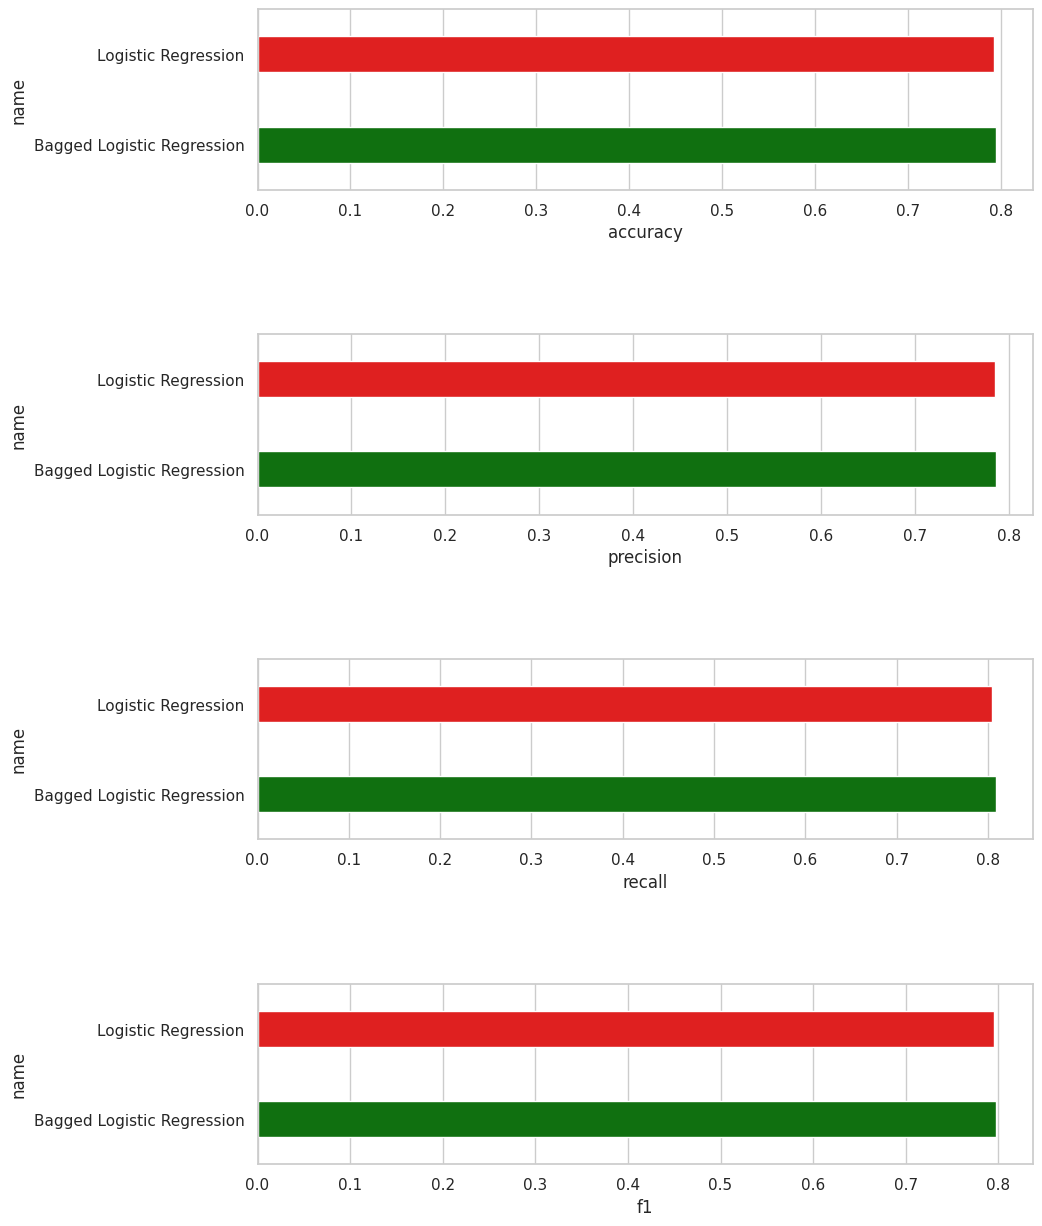

In [187]:
model_names = ['Logistic Regression', 'Bagged Logistic Regression']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'Logistic Regression') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

RandomForest

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
clf8 = RandomForestClassifier(max_depth=2, random_state=0)
clf8.fit(x_train, y_train)

# Evaluate the Random Forest classifier on the test set
y_pred = clf8.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

g_acc.append(accuracy)
g_prec.append(precision)
g_rec.append(recall)
g_f1.append(f1)

# Perform cross-validation on the Random Forest classifier
scores_cross_8 = cross_val_score(RandomForestClassifier(), X_scaled, y_sm, cv=5)
print("Mean cross-validation accuracy:", scores_cross_8.mean())

Accuracy: 0.7854043392504931
Precision: 0.7317541613316261
Recall: 0.9014195583596214
F1: 0.807773851590106


Mean cross-validation accuracy: 0.9518343195266272


VotingClassifier

In [189]:
from sklearn.ensemble import VotingClassifier

loc_acc = []
loc_prec = []
loc_rec = []
loc_f1 = []

# Define the list of classifiers
classifiers = [
    ['Naive Bayes :', GaussianNB()],
    ['LogisticRegression :', LogisticRegression(max_iter=1000)],
    ['DecisionTree :', DecisionTreeClassifier()]
]

# Train the hard voting classifier
vot_hard = VotingClassifier(estimators=classifiers, voting='hard')
vot_hard.fit(x_train, y_train)

# Evaluate the hard voting classifier on the test set
y_pred_hard = vot_hard.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores for the hard voting classifier
accuracy_hard = accuracy_score(y_test, y_pred_hard)
precision_hard = precision_score(y_test, y_pred_hard)
recall_hard = recall_score(y_test, y_pred_hard)
f1_hard = f1_score(y_test, y_pred_hard)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results for the hard voting classifier
print("Hard Voting Accuracy:", accuracy_hard)
print("Hard Voting Precision:", precision_hard)
print("Hard Voting Recall:", recall_hard)
print("Hard Voting F1:", f1_hard)

# Perform cross-validation on the hard voting classifier
scores_cross_hard = cross_val_score(
    VotingClassifier(estimators=classifiers, voting='hard'),
    X_scaled, y_sm, cv=5
)
print("Mean Cross-Validation Accuracy (Hard Voting):", scores_cross_hard.mean())

# Train the soft voting classifier
vot_soft = VotingClassifier(estimators=classifiers, voting='soft')
vot_soft.fit(x_train, y_train)

# Evaluate the soft voting classifier on the test set
y_pred_soft = vot_soft.predict(x_test)

# Calculate accuracy, precision, recall, and F1 scores for the soft voting classifier
accuracy_soft = accuracy_score(y_test, y_pred_soft)
precision_soft = precision_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)

loc_acc.append(accuracy)
loc_prec.append(precision)
loc_rec.append(recall)
loc_f1.append(f1)

# Print the results for the soft voting classifier
print("Soft Voting Accuracy:", accuracy_soft)
print("Soft Voting Precision:", precision_soft)
print("Soft Voting Recall:", recall_soft)
print("Soft Voting F1:", f1_soft)

# Perform cross-validation on the soft voting classifier
scores_cross_soft = cross_val_score(
    VotingClassifier(estimators=classifiers, voting='soft'),
    X_scaled, y_sm, cv=5
)
print("Mean Cross-Validation Accuracy (Soft Voting):", scores_cross_soft.mean())

g_acc.append(accuracy.max())
g_prec.append(precision.max())
g_rec.append(recall.max())
g_f1.append(f1.max())

Hard Voting Accuracy: 0.8587771203155818
Hard Voting Precision: 0.8236130867709816
Hard Voting Recall: 0.9132492113564669
Hard Voting F1: 0.8661181750186986


Mean Cross-Validation Accuracy (Hard Voting): 0.8648520710059172
Soft Voting Accuracy: 0.8919132149901381
Soft Voting Precision: 0.8617176128093159
Soft Voting Recall: 0.9337539432176656
Soft Voting F1: 0.8962906888720666
Mean Cross-Validation Accuracy (Soft Voting): 0.8933727810650888


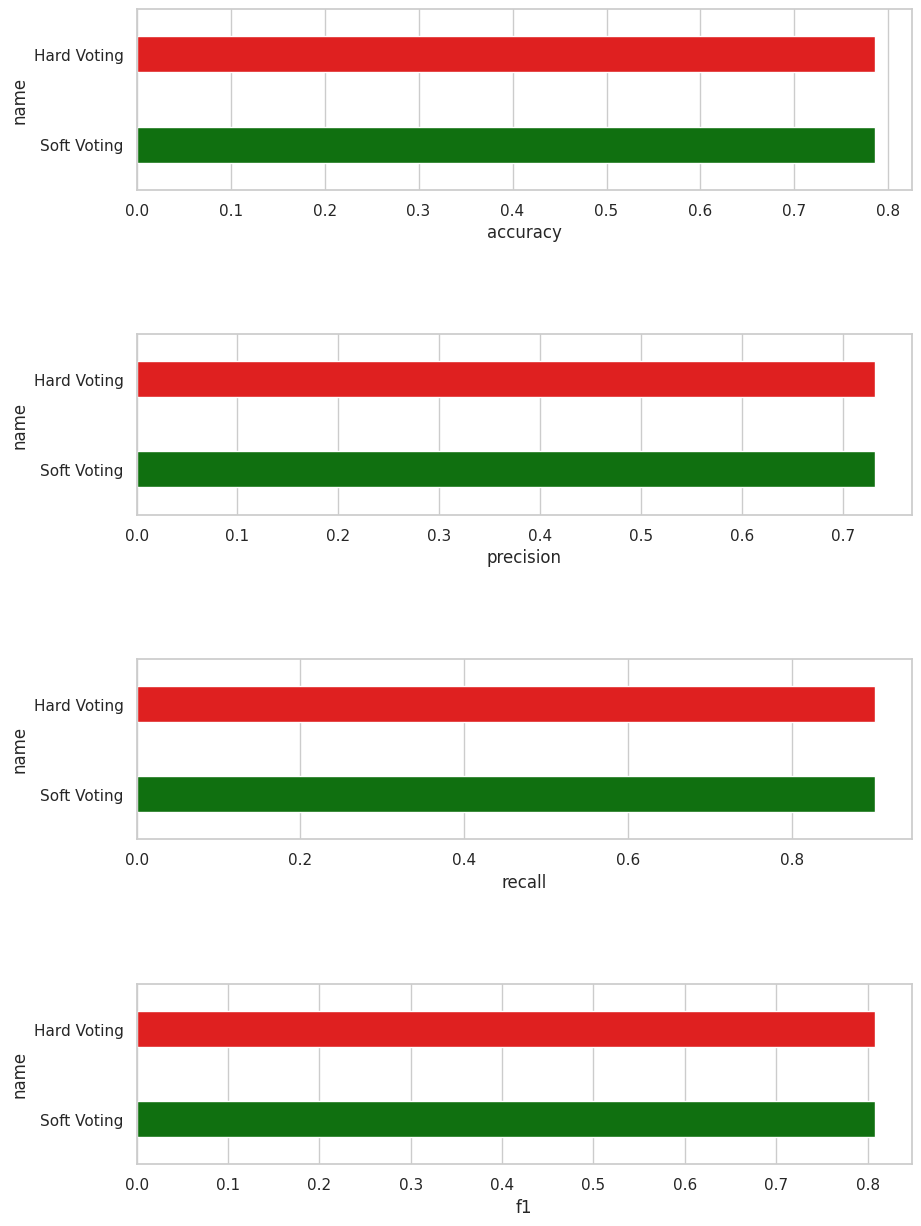

In [190]:
model_names = ['Hard Voting', 'Soft Voting']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = loc_acc
df_plt['precision'] = loc_prec
df_plt['recall'] = loc_rec
df_plt['f1'] = loc_f1

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

cols = ['red' if (x == 'Hard Voting') else 'green' for x in model_names]

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], hue ='name', width=0.4, palette=cols)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], hue='name', width=0.4, palette=cols)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], hue='name', width=0.4, palette=cols)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

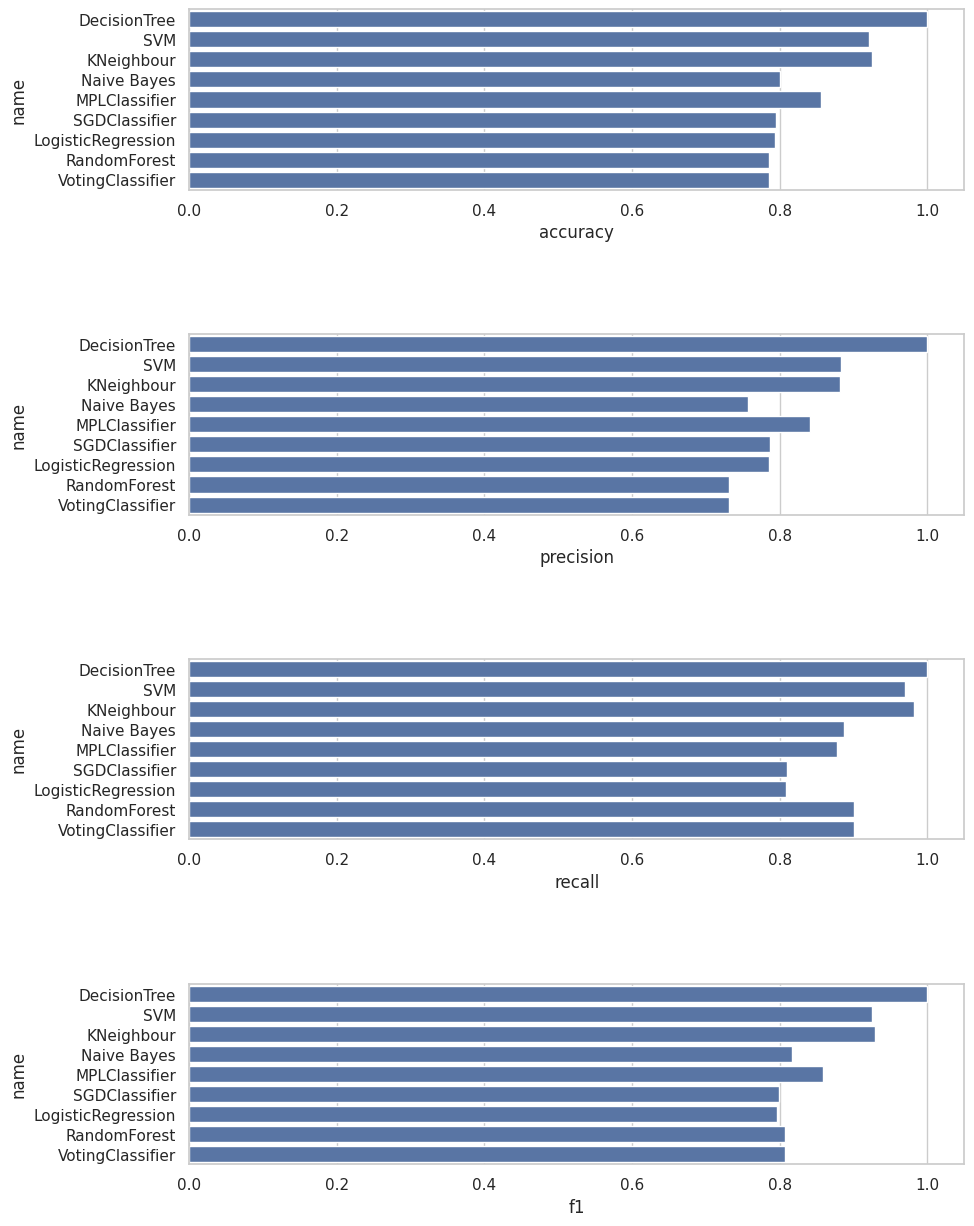

In [195]:
model_names = ['DecisionTree', 'SVM', 'KNeighbour', 'Naive Bayes', 'MPLClassifier', 'SGDClassifier', 'LogisticRegression', 'RandomForest', 'VotingClassifier']
df_plt = pd.DataFrame()
df_plt['name'] = model_names
df_plt['accuracy'] = g_acc
df_plt['precision'] = g_prec
df_plt['recall'] = g_rec
df_plt['f1'] = g_f1

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)

sns.set(style="whitegrid", rc={'figure.figsize':(10,15)})
fig, axes = plt.subplots(4, 1)

# Create subplots for each metric
sns.barplot(y="name", x="accuracy", data=df_plt, ax=axes[0], width=0.8)
sns.barplot(y="name", x="precision", data=df_plt, ax=axes[1], width=0.8)
sns.barplot(y="name", x="recall", data=df_plt, ax=axes[2], width=0.8)
sns.barplot(y="name", x="f1", data=df_plt, ax=axes[3], width=0.8)



plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()